### Mario Enrique Pisquiy Gómez
#### Carné 20200399

In [1]:
def imgnorm(img):
    """Nomalize an image
    Args:
        img (numpy array): Source image
    Returns:
        normalized (numpy array): Nomalized image
    """
    vmin, vmax = img.min(), img.max()
    normalized_values = []
    delta = vmax-vmin

    for p in img.ravel():
        normalized_values.append(255*(p-vmin)/delta)

    normalized  = np.array(normalized_values).astype(np.uint8).reshape(img.shape[0],-1)
    return normalized

In [2]:
def binarizacion(image):
    imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    normalized = imgnorm(imgray)
    binarized = cv.adaptiveThreshold(normalized, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,0)
    return binarized

In [3]:
def encontrarContornos(image):
    mode = cv.RETR_TREE 
    method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE]
    contours, hierarchy = cv.findContours(image, mode, method[0])
    return contours

In [4]:
def encontrarPlaca(image):
    contours = encontrarContornos(image)
    contorno = []
    caracteristicas = []
    extent = 0

    for c in contours:
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w>h and area > 4000):
            rect_area = w*h
            extent1 = float(area)/rect_area
            if extent1 > extent:
                extent = extent1
                contorno = c
                caracteristicas = [x,y,w,h]
                
    placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]
    return placa

In [5]:
def encontrarNumeros(image):
    contours = encontrarContornos(image)
    contorno = []
    extent = 0
    direcciones_y = {}
    tamaño_placa = placa.shape
    area_min = tamaño_placa[0] * tamaño_placa[1] * 0.011

    for c in contours:
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w<h and area > area_min):
            contorno.append(c)
            if (y in direcciones_y):
                direcciones_y[y].append([x,y,w,h,len(contorno)-1])
            elif ((y-1) in direcciones_y):
                direcciones_y[y-1].append([x,y,w,h,len(contorno)-1])
            elif ((y-2) in direcciones_y):
                direcciones_y[y-2].append([x,y,w,h,len(contorno)-1])
            elif ((y-3) in direcciones_y):
                direcciones_y[y-3].append([x,y,w,h,len(contorno)-1])
            elif ((y+1) in direcciones_y):
                direcciones_y[y+1].append([x,y,w,h,len(contorno)-1])
            elif ((y+2) in direcciones_y):
                direcciones_y[y+2].append([x,y,w,h,len(contorno)-1])
            elif ((y+3) in direcciones_y):
                direcciones_y[y+3].append([x,y,w,h,len(contorno)-1])
            else:
                direcciones_y[y] = [[x,y,w,h,len(contorno)-1]]

    keys = []
    eliminados = 0
    for key in direcciones_y:
        if len(direcciones_y[key]) < 2:
            for element in direcciones_y[key]:
                contorno.pop(int(element[4]-eliminados))
                keys.append(key)
                eliminados = eliminados + 1
    for key in keys:
        direcciones_y.pop(key)

    return contorno

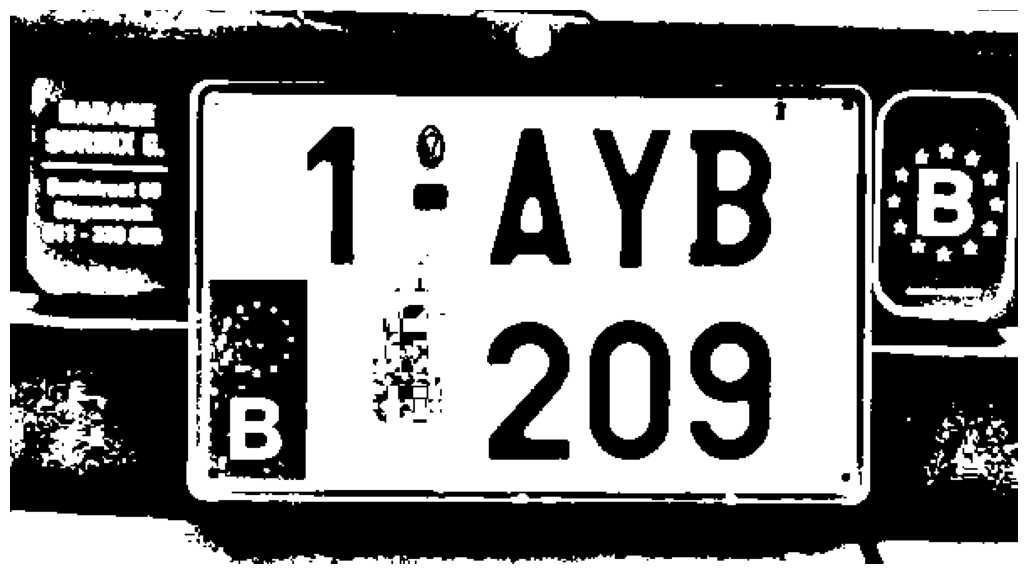

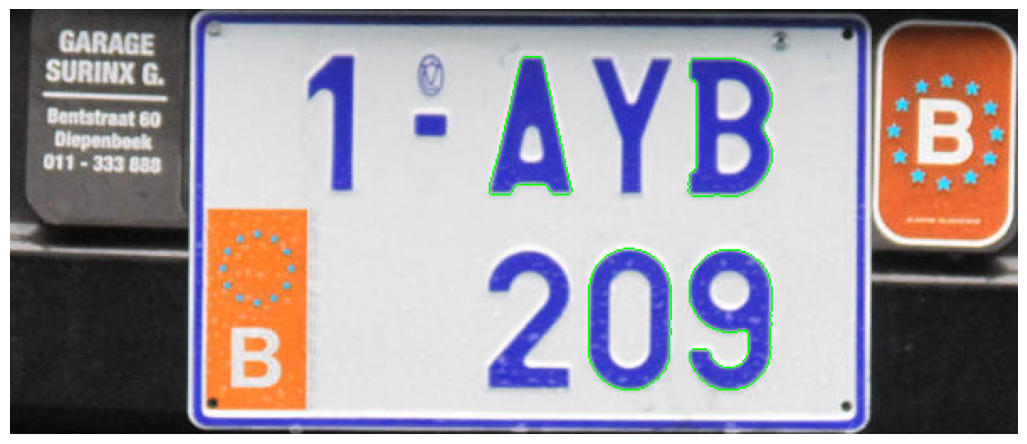

In [10]:
binarized = binarizacion(im)
cvlib.imgview(binarized)
placa = encontrarPlaca(binarized)
numeros = encontrarNumeros(binarizacion(placa))
cvlib.imgview(cv.drawContours(placa.copy(), numeros, -1, color, 1))

In [6]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pickle
import errno
import cvlib
import io


%matplotlib inline
#plt.style.use('dark_background') 
PATH = 'C:/GitHub/pythonPrograms/computerVision2023/proyectos/LicencePlates/'

In [7]:
filename=PATH+'images127.jpg'

(330, 600, 3)


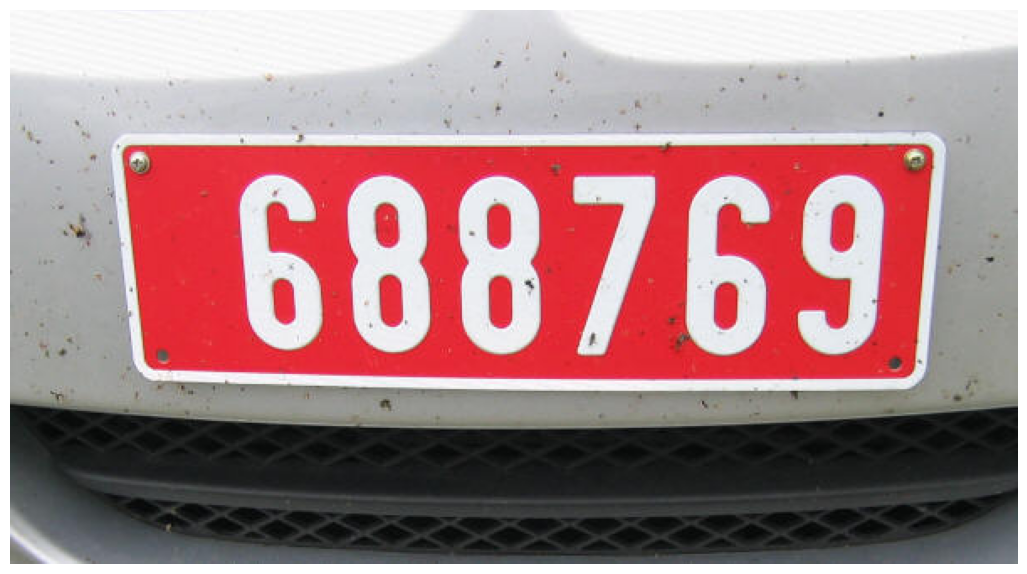

In [14]:
color = (0,255,0)
im = cv.imread(filename,cv.IMREAD_COLOR)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(im.shape)
cvlib.imgview(im)

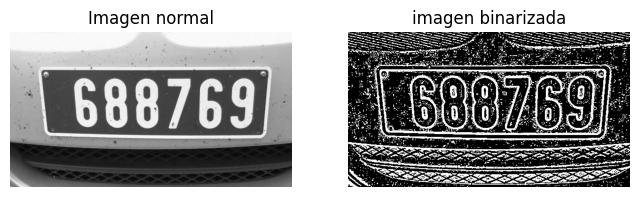

In [15]:
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
normalized = imgnorm(imgray)
binarized = cv.adaptiveThreshold(normalized, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
cvlib.imgcmp(imgray,binarized, ['Imagen normal', 'imagen binarizada'])

In [16]:
mode = cv.RETR_TREE 
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE]
contours, hierarchy = cv.findContours(binarized, mode, method[0])

In [17]:
contorno = []
caracteristicas = []
extent = 0

for c in contours:
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w>h and area > 4000):
        rect_area = w*h
        extent1 = float(area)/rect_area
        if extent1 > extent:
            extent = extent1
            contorno = c
            caracteristicas = [x,y,w,h]

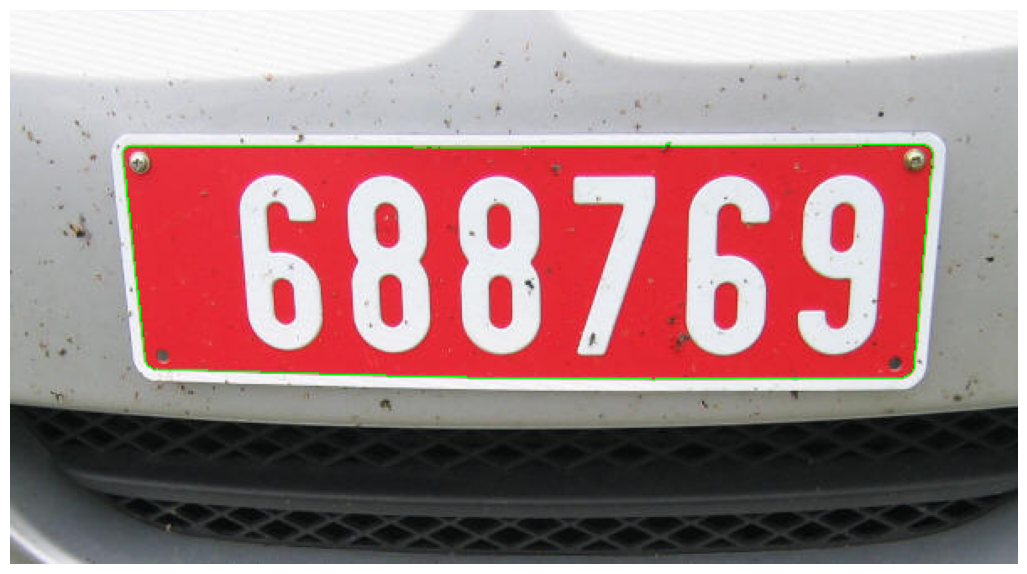

In [18]:
cvlib.imgview(cv.drawContours(im.copy(), contorno, -1, color, 1))

In [20]:
placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]

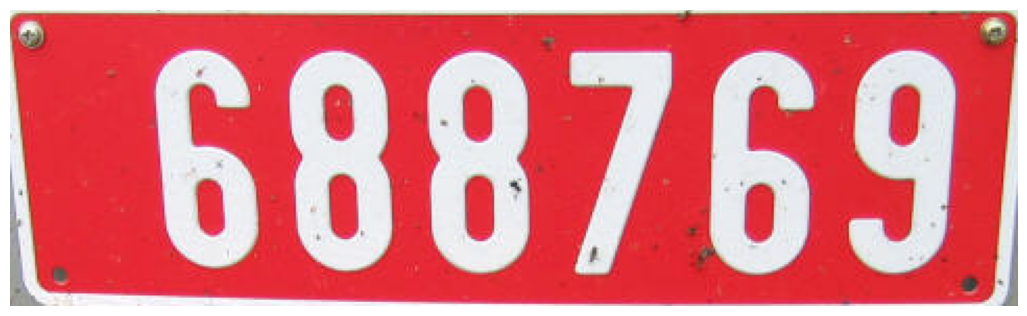

In [21]:
cvlib.imgview(placa)

In [22]:
placaBinarized = binarizacion(placa)

In [23]:
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(placaBinarized, mode, method[0])

In [26]:
contours = encontrarContornos(placaBinarized)
contorno = []
extent = 0
direcciones_y = {}
tamaño_placa = placa.shape
area_min = tamaño_placa[0] * tamaño_placa[1] * 0.005

for c in contours:
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w<h and area > area_min):
        contorno.append(c)
        if (y in direcciones_y):
            direcciones_y[y].append([x,y,w,h,len(contorno)-1])
        elif ((y-1) in direcciones_y):
            direcciones_y[y-1].append([x,y,w,h,len(contorno)-1])
        elif ((y-2) in direcciones_y):
            direcciones_y[y-2].append([x,y,w,h,len(contorno)-1])
        elif ((y-3) in direcciones_y):
            direcciones_y[y-3].append([x,y,w,h,len(contorno)-1])
        elif ((y+1) in direcciones_y):
            direcciones_y[y+1].append([x,y,w,h,len(contorno)-1])
        elif ((y+2) in direcciones_y):
            direcciones_y[y+2].append([x,y,w,h,len(contorno)-1])
        elif ((y+3) in direcciones_y):
            direcciones_y[y+3].append([x,y,w,h,len(contorno)-1])
        else:
            direcciones_y[y] = [[x,y,w,h,len(contorno)-1]]
print(direcciones_y)

keys = []
eliminados = 0
for key in direcciones_y:
    if len(direcciones_y[key]) < 2:
        for element in direcciones_y[key]:
            contorno.pop(int(element[4]-eliminados))
            keys.append(key)
            eliminados = eliminados + 1

if len(direcciones_y) > 1:
    for i in direcciones_y:
        if len(direcciones_y[i]) < 3:
            keys.append(i)
            
for key in keys:
    if (key in direcciones_y):
        direcciones_y.pop(key)

direcciones_y = OrderedDict(sorted(direcciones_y.items()))

for i in direcciones_y:
    direcciones_y[i] = sorted(direcciones_y[i], key=lambda x: x[0])

print(direcciones_y)

{20: [[402, 20, 51, 106, 0], [335, 20, 51, 107, 1], [268, 20, 49, 107, 2], [200, 20, 49, 106, 3], [134, 20, 49, 105, 6], [69, 19, 50, 105, 7]], 78: [[217, 78, 16, 34, 4]], 35: [[216, 35, 16, 30, 5]]}
OrderedDict([(20, [[69, 19, 50, 105, 7], [134, 20, 49, 105, 6], [200, 20, 49, 106, 3], [268, 20, 49, 107, 2], [335, 20, 51, 107, 1], [402, 20, 51, 106, 0]])])


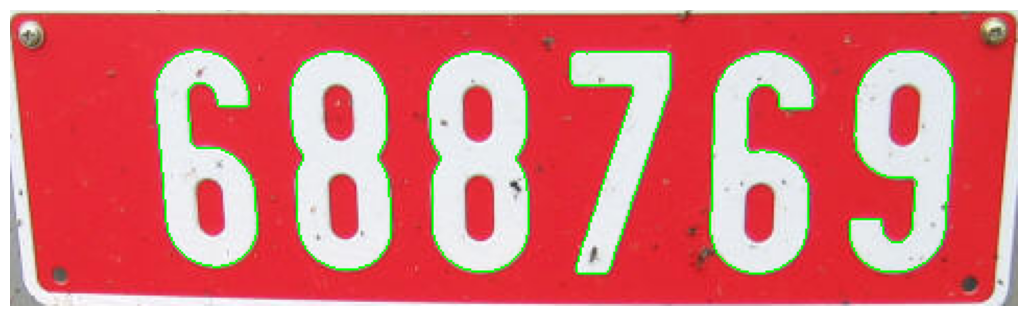

In [27]:
cvlib.imgview(cv.drawContours(placa.copy(), contorno, -1, color, 1))

In [22]:
for keys, values in direcciones_y.items(): 
    for i in values:
        cv.rectangle(placa, (i[0], i[1]), (i[0]+i[2], i[1]+i[3]), color, 3)

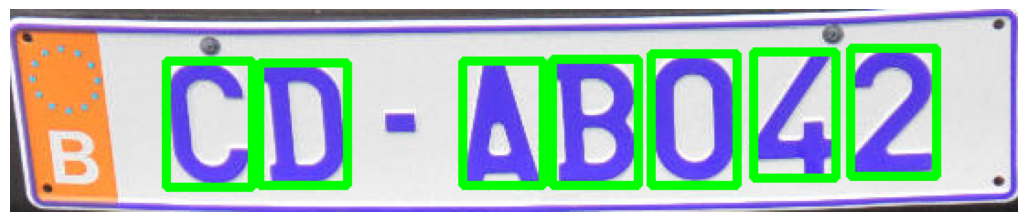

In [23]:
cvlib.imgview(placa)

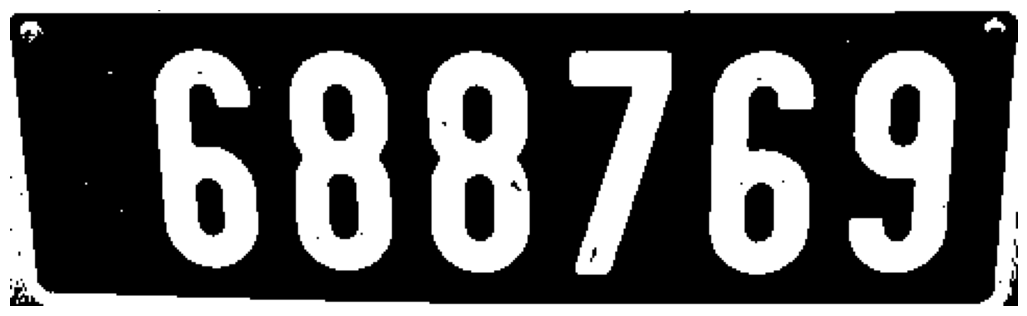

In [53]:
cvlib.imgview(placaBinarized)

In [58]:
linea_placa = list(placaBinarized[int(caracteristicas[3]/2),:])
count_negro = linea_placa.count(0)
count_blanco = linea_placa.count(255)
print(str(count_negro) + ", " + str(count_blanco))

260, 223


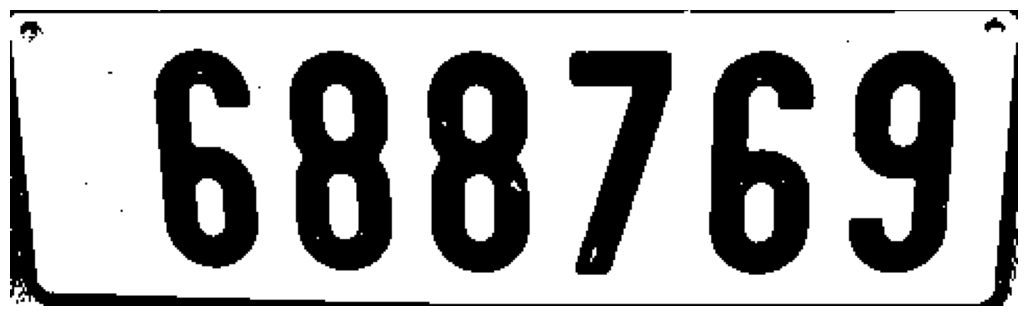

In [54]:
placaBinarized2 = cv.threshold(placaBinarized,0,255, cv.THRESH_BINARY_INV)[1]

In [57]:
linea_placa = list(placaBinarized2[int(caracteristicas[3]/2),:])
count_negro = linea_placa.count(0)
count_blanco = linea_placa.count(255)
print(str(count_negro) + ", " + str(count_blanco))

223, 260


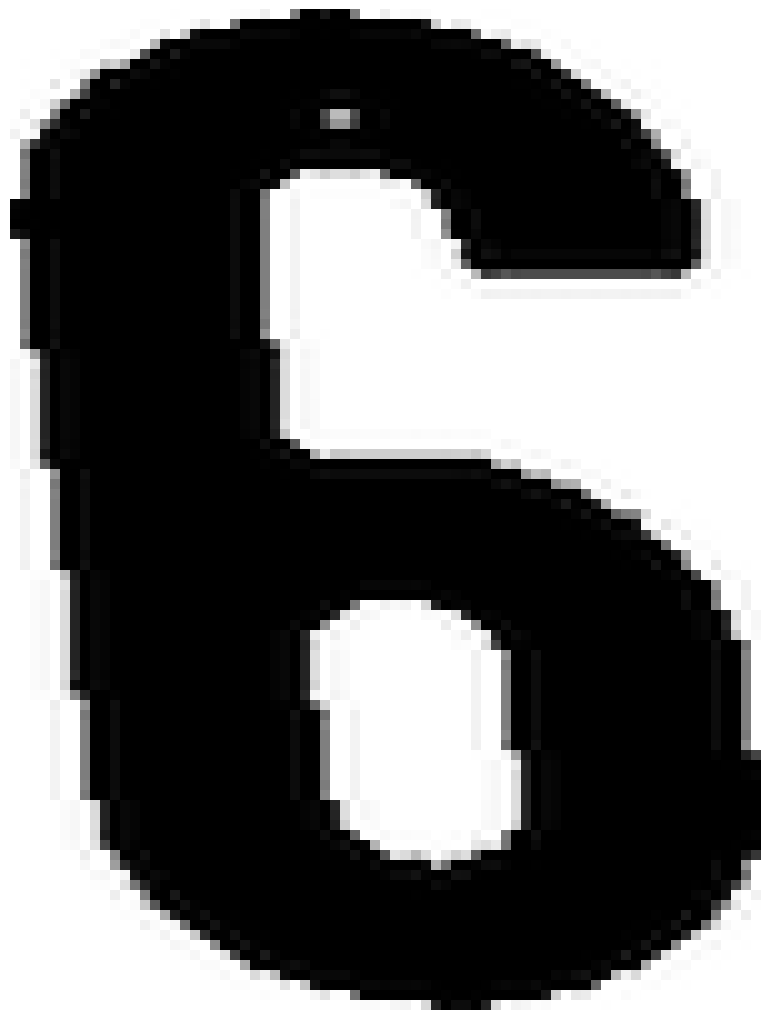

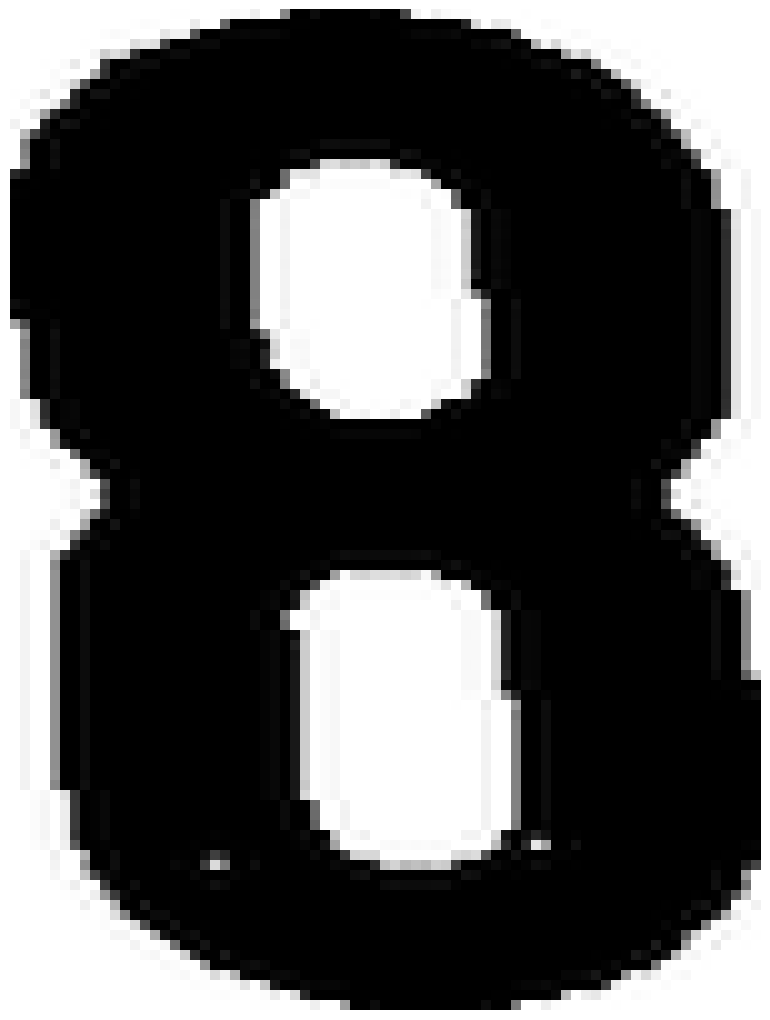

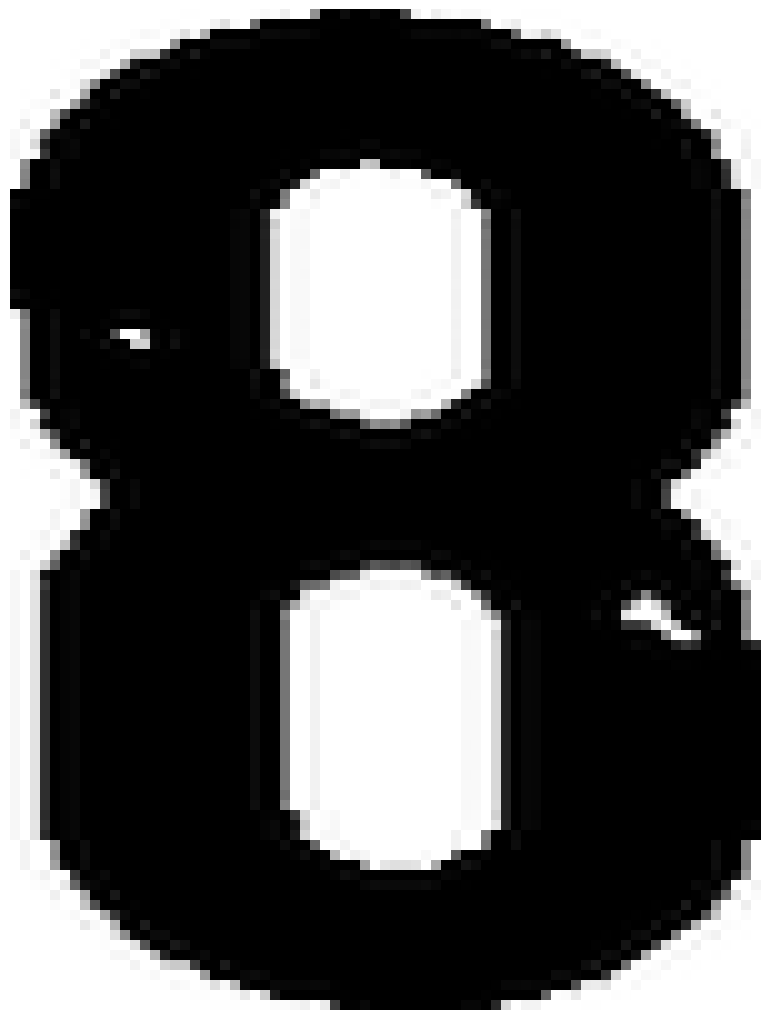

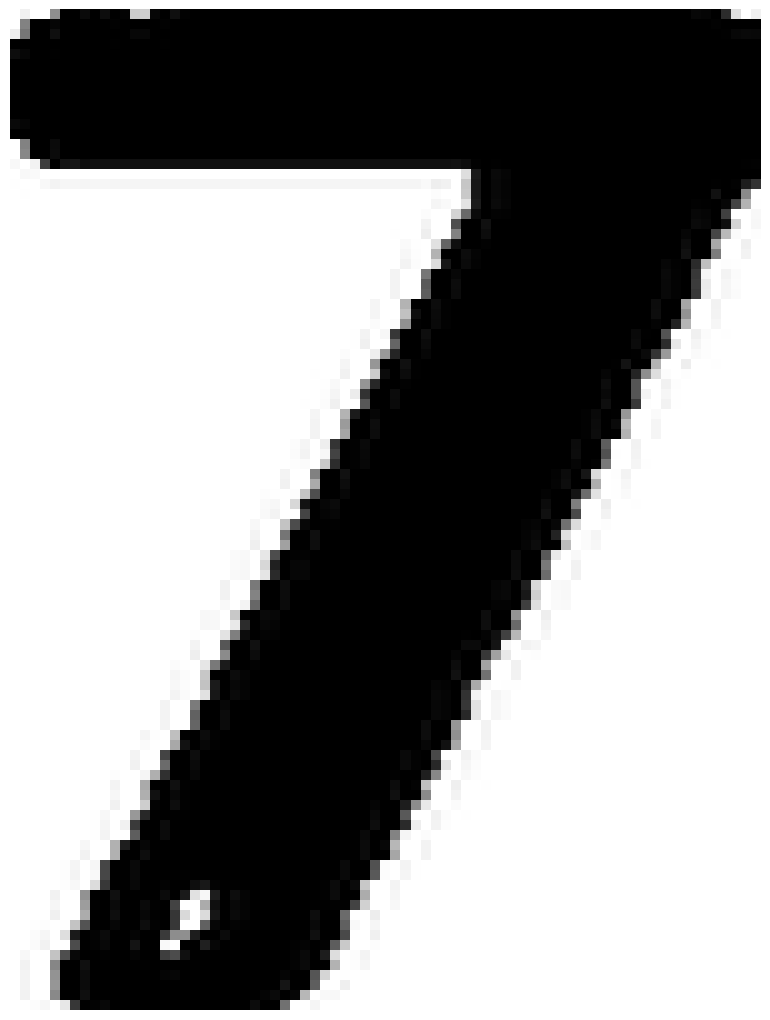

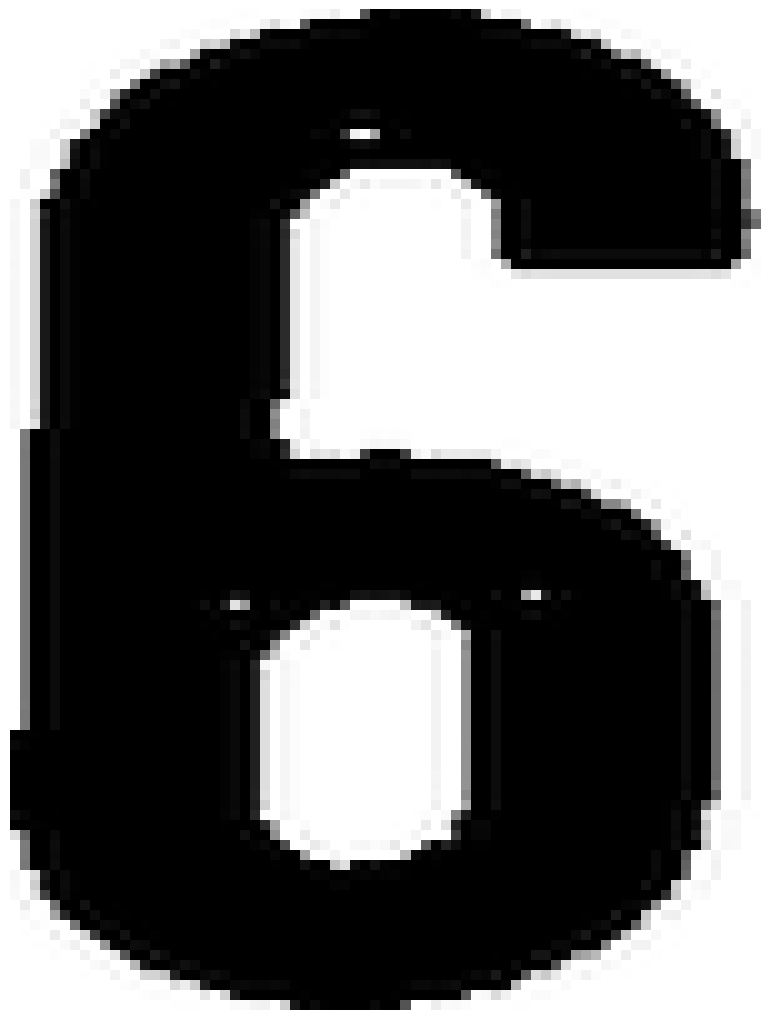

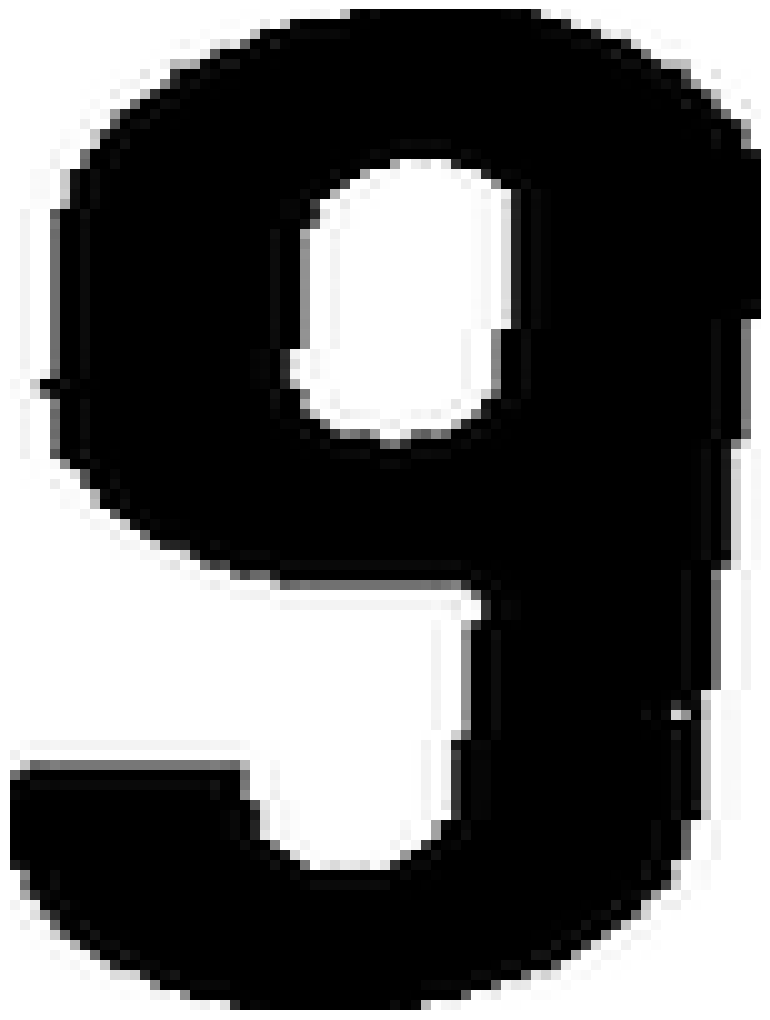

In [59]:
characters = []
linea_placa = list(placaBinarized[int(caracteristicas[3]/2),:])
count_negro = linea_placa.count(0)
count_blanco = linea_placa.count(255)
if count_negro > count_blanco:
     placaBinarized = cv.threshold(placaBinarized,0,255, cv.THRESH_BINARY_INV)[1]
for keys, values in direcciones_y.items(): 
    for i in values:
        character =  placaBinarized[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
        res = cv.resize(character, dsize=(75, 100), interpolation=cv.INTER_LANCZOS4)
        cvlib.imgview(res)
        res_flatten = res.flatten()
        characters.append(res_flatten)

In [50]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

In [60]:
result = loaded_model.predict(characters)

In [61]:
result

array(['6', '8', '8', '3', '6', '9'], dtype='<U1')